In [34]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

In [35]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [36]:
def adder(state:AgentState)->AgentState:
    """Esse nodo soma 2 numeros"""

    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state:AgentState)->AgentState:
    """Esse nodo subtrai 2 numeros"""

    state["finalNumber"] = state["number1"] - state["number2"]

    return state

def decide_next_node(state:AgentState)->AgentState:
    """Decide qual sera o proximo nodo do grafo"""

    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"


In [37]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges("router",decide_next_node,{"addition_node":"add_node","subtraction_operation": "subtract_node"})
graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app = graph.compile()

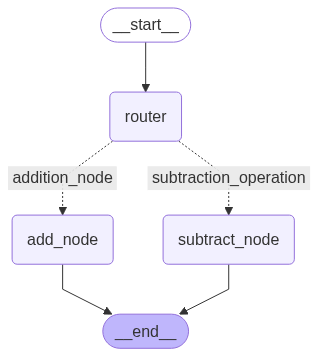

In [38]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
initial_state1 = AgentState(number1=10, operation="-",number2=5)
print(app.invoke(initial_state1))



{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}
